# Grupo 3
# Alumnos: Eduardo Patinella y Alberto Barrio.

1) Búsqueda de tweets con #Facebook y #Meta LIST
2) Filtrado y limpiado (eliminar emoticons, hastag, urls) LISTO
3) Utilizar etiquetado POS y lematizacion. Hacer nube de palabras con los adjetivos.
4) Hacer gráfico de torta con las personas mas mencionadas
5) Hacer análisis de sentimiento con Polaridad con respecto al Metaverso# 

In [1]:
import os
from dotenv import load_dotenv
# Cargar valores del archivo .env en las variables de entorno
load_dotenv()
# Cargar valor del token a variable
bearer_token = os.environ.get("BEARER_TOKEN")

In [2]:
#Especificamos datos de la consulta
headers = {
    "Authorization": f"Bearer {bearer_token}",
    "User-Agent":"v2FullArchiveSearchPython"
}
hastag='(#Facebook) (#Meta OR #Metaverse)'
palabras_spam = '-sanshutoken -btc -buy -blockchain -sale -Clicking -crypto -Offer -bitcoin -#btc -#buy -#blockchain -#sale -#Clicking -#crypto -#Offer -#bitcoin'
params = {
    'query': f'{hastag} -is:retweet {palabras_spam} lang:en', #Va a traer los que tienen el hashtag '#machinelearning' y el -is:retweet es para que no traigra retweets
    'start_time':'2021-10-28T00:00:00.000Z',
    'end_time':'2021-10-29T23:59:00.000Z',
    #'next_token': token,
    'max_results':100  #Y que traiga 100 resultados maximo

}


In [3]:
#Hacemos la consulta
import requests
response = requests.get(url, headers=headers, params=params)
print(response)
# Generar excepción si la respuesta no es exitosa
if response.status_code != 200:
    raise Exception(response.status_code, response.text)
import pandas as pd
df = pd.json_normalize(response.json()['data'])
df

NameError: name 'url' is not defined

In [340]:
from nltk.tokenize import TweetTokenizer # libreria especifica para los tokenizar tweets 

tt = TweetTokenizer() # intanciamos ya que es un modelo lo que vamos a llamar
# Aplicar Tokenizer a la columna
tokenized_text = df['text'].apply(tt.tokenize)
df["tokenized_text"] = tokenized_text
df
#df.to_csv('con#')

,id,text,tokenized_text
0,1454236343534592000,"@elonmusk @nichegamer ""𝐌𝐄𝐓𝐀"" @facebookapp , 𝐓𝐡...","[@elonmusk, @nichegamer, "", 𝐌𝐄𝐓𝐀, "", @facebook..."
1,1454235492468379650,"With Facebook new name (Meta), FAANG will be M...","[With, Facebook, new, name, (, Meta, ), ,, FAA..."
2,1454235433538183168,Rebranding from #Facebook to #Meta is not an a...,"[Rebranding, from, #Facebook, to, #Meta, is, n..."
3,1454235338029899779,Dad Joke OTD:\n\nI told my son Facebook is cha...,"[Dad, Joke, OTD, :, I, told, my, son, Facebook..."
4,1454235103186628610,@MissionToZyxx Nermit Bundaloy‘s love for virt...,"[@MissionToZyxx, Nermit, Bundaloy, ‘, s, love,..."
...,...,...,...
95,1454213825113251848,"$WIMI breakout 🏃💨\n\nThe ""WiMi Metaverse"" trad...","[$, WIMI, breakout, 🏃, 💨, The, "", WiMi, Metave..."
96,1454213750005895169,@stevewoz claims @Apple didn’t have to change ...,"[@stevewoz, claims, @Apple, didn, ’, t, have, ..."
97,1454213702471897089,"@Snowden focus on purpose and goal, not name #...","[@Snowden, focus, on, purpose, and, goal, ,, n..."
98,1454213647031537665,FB goes Meta—Parler app the new Facebook? http...,"[FB, goes, Meta, —, Parler, app, the, new, Fac..."


In [5]:
# Crear lista sin stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import re
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean(x):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F" # emoticons
        u"\U0001F300-\U0001F5FF" # symbols & pictographs
        u"\U0001F680-\U0001F6FF" # transport & map symbols
        u"\U0001F1E0-\U0001F1FF" # flags (iOS)
                           "]+", flags = re.UNICODE)
    n = regrex_pattern.sub(r'', x)
    if (not x.lower() in stop_words) and (n != ''):
        return True
    else:
        return False
for index, tweet in enumerate(tokenized_text):
    tweet = [x for x in tweet if clean(x)]
    tokenized_text[index] = tweet

df["tokenized_text"] = tokenized_text
df

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/eduardo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


NameError: name 'tokenized_text' is not defined

In [333]:
#Segunda limpieza para sacar urls, # y palabras de 1 caracter
i=0
list_aux=[]

for text in df['tokenized_text']:
    #text=eval(str_text) # lo convertimos en lista para poder iterar por palabra
    #print("\nTEXTO A ANALIZAR ->",text)
    j=0
    for palabra in text:
        #print("->palabra a analizar: ", palabra)
        if(re.search('^#+',palabra)):
            palabra = re.sub(r'.', '', palabra, count = 1) # eliminamos el primer caracter que es "#"
            list_aux.append(palabra)
            j=j+1
        elif(re.search("^http+",palabra)):
            j=j+1#print("->palabra sacar ->", palabra)
        elif(len(palabra)==1):
            j=j+1
            #print("->palabra sacada ->", palabra)
        else:
            list_aux.append(palabra)
            j=j+1
    
    print(len(df['tokenized_text'][i]), "<->",)
    #df['tokenized_text'][i]=list_aux
    list_aux=[]
    i=i+1
     
df=df[['tokenized_text']]
df

ValueError: cannot set using a list-like indexer with a different length than the value

In [334]:
df

,id,text,tokenized_text
0,1454236343534592000,"@elonmusk @nichegamer ""𝐌𝐄𝐓𝐀"" @facebookapp , 𝐓𝐡...","[@elonmusk, @nichegamer, "", 𝐌𝐄𝐓𝐀, "", @facebook..."
1,1454235492468379650,"With Facebook new name (Meta), FAANG will be M...","[With, Facebook, new, name, (, Meta, ), ,, FAA..."
2,1454235433538183168,Rebranding from #Facebook to #Meta is not an a...,"[Rebranding, from, #Facebook, to, #Meta, is, n..."
3,1454235338029899779,Dad Joke OTD:\n\nI told my son Facebook is cha...,"[Dad, Joke, OTD, :, I, told, my, son, Facebook..."
4,1454235103186628610,@MissionToZyxx Nermit Bundaloy‘s love for virt...,"[@MissionToZyxx, Nermit, Bundaloy, ‘, s, love,..."
...,...,...,...
95,1454116778846609416,🚨 Social Media Industry Update 🚨\n\nHave you s...,"[🚨, Social, Media, Industry, Update, 🚨, Have, ..."
96,1454116766846701571,"Well written piece with a bit of personality, ...","[Well, written, piece, with, a, bit, of, perso..."
97,1454116733904568321,"Facebook’s new name Meta is Greek for “beyond,...","[Facebook, ’, s, new, name, Meta, is, Greek, f..."
98,1454116628333928453,Ever Meta person whose Face lights up like a b...,"[Ever, Meta, person, whose, Face, lights, up, ..."


In [312]:
## HACEMOS UN GRAFICO DE TORTA PAR SABER CUALES FUERON LOS USUARIOS MAS MENCIONADOS
menciones=[]
i=0
for text in df['tokenized_text']:
    #text=eval(str_text) # lo convertimos en lista para poder iterar por palabra
    #print("\nTEXTO A ANALIZAR ->",text)
    j=0
    for palabra in text:
        #print("->palabra a analizar: ", palabra)
        if(re.search('^@+',palabra)):
            #palabra = re.sub(r'.', '', palabra, count = 1) # eliminamos el primer caracter que es "@"
            #palabra=palabra.lower()
            menciones.append(palabra.lower())
        j=j+1
    i=i+1
    #print("\n TEXTO DEVULETO ->", text) 
menciones

['@elonmusk',
 '@nichegamer',
 '@facebookapp',
 '@elonmusk',
 '@missiontozyxx',
 '@citylcs',
 '@finkd',
 '@meta',
 '@bloktopia',
 '@bsonblast',
 '@meta',
 '@pocnetworknews',
 '@decentraland',
 '@thewrap',
 '@parikpatelcfa',
 '@cz_binance',
 '@ovrthereality',
 '@binance',
 '@meta',
 '@facebook',
 '@cwarzel',
 '@papitrumpo',
 '@meta',
 '@meta',
 '@finkd',
 '@sherylsandberg',
 '@amyklobuchar',
 '@parliament_jo',
 '@tyler',
 '@cameron',
 '@metagascar_',
 '@metagascar_com',
 '@metagas',
 '@fbnewsroom',
 '@meta',
 '@facebook',
 '@meta',
 '@msense_app',
 '@finkd',
 '@koparafallskid',
 '@stevewoz',
 '@apple',
 '@jack',
 '@snowden',
 '@auradeluxe',
 '@',
 '@meta',
 '@meta',
 '@meta',
 '@keiichiban',
 '@msblairewhite',
 '@vftsolutions',
 '@portabletvapp',
 '@directv',
 '@dish',
 '@plutotv',
 '@roku',
 '@amazonfiretv',
 '@rt_america',
 '@youtube',
 '@jcats2013',
 '@newsmax',
 '@gillianmckeith',
 '@breaking24_7',
 '@uploadvr',
 '@facebook',
 '@yousefmunayyer',
 '@mattgurney',
 '@rubinaahmedhaq',
 

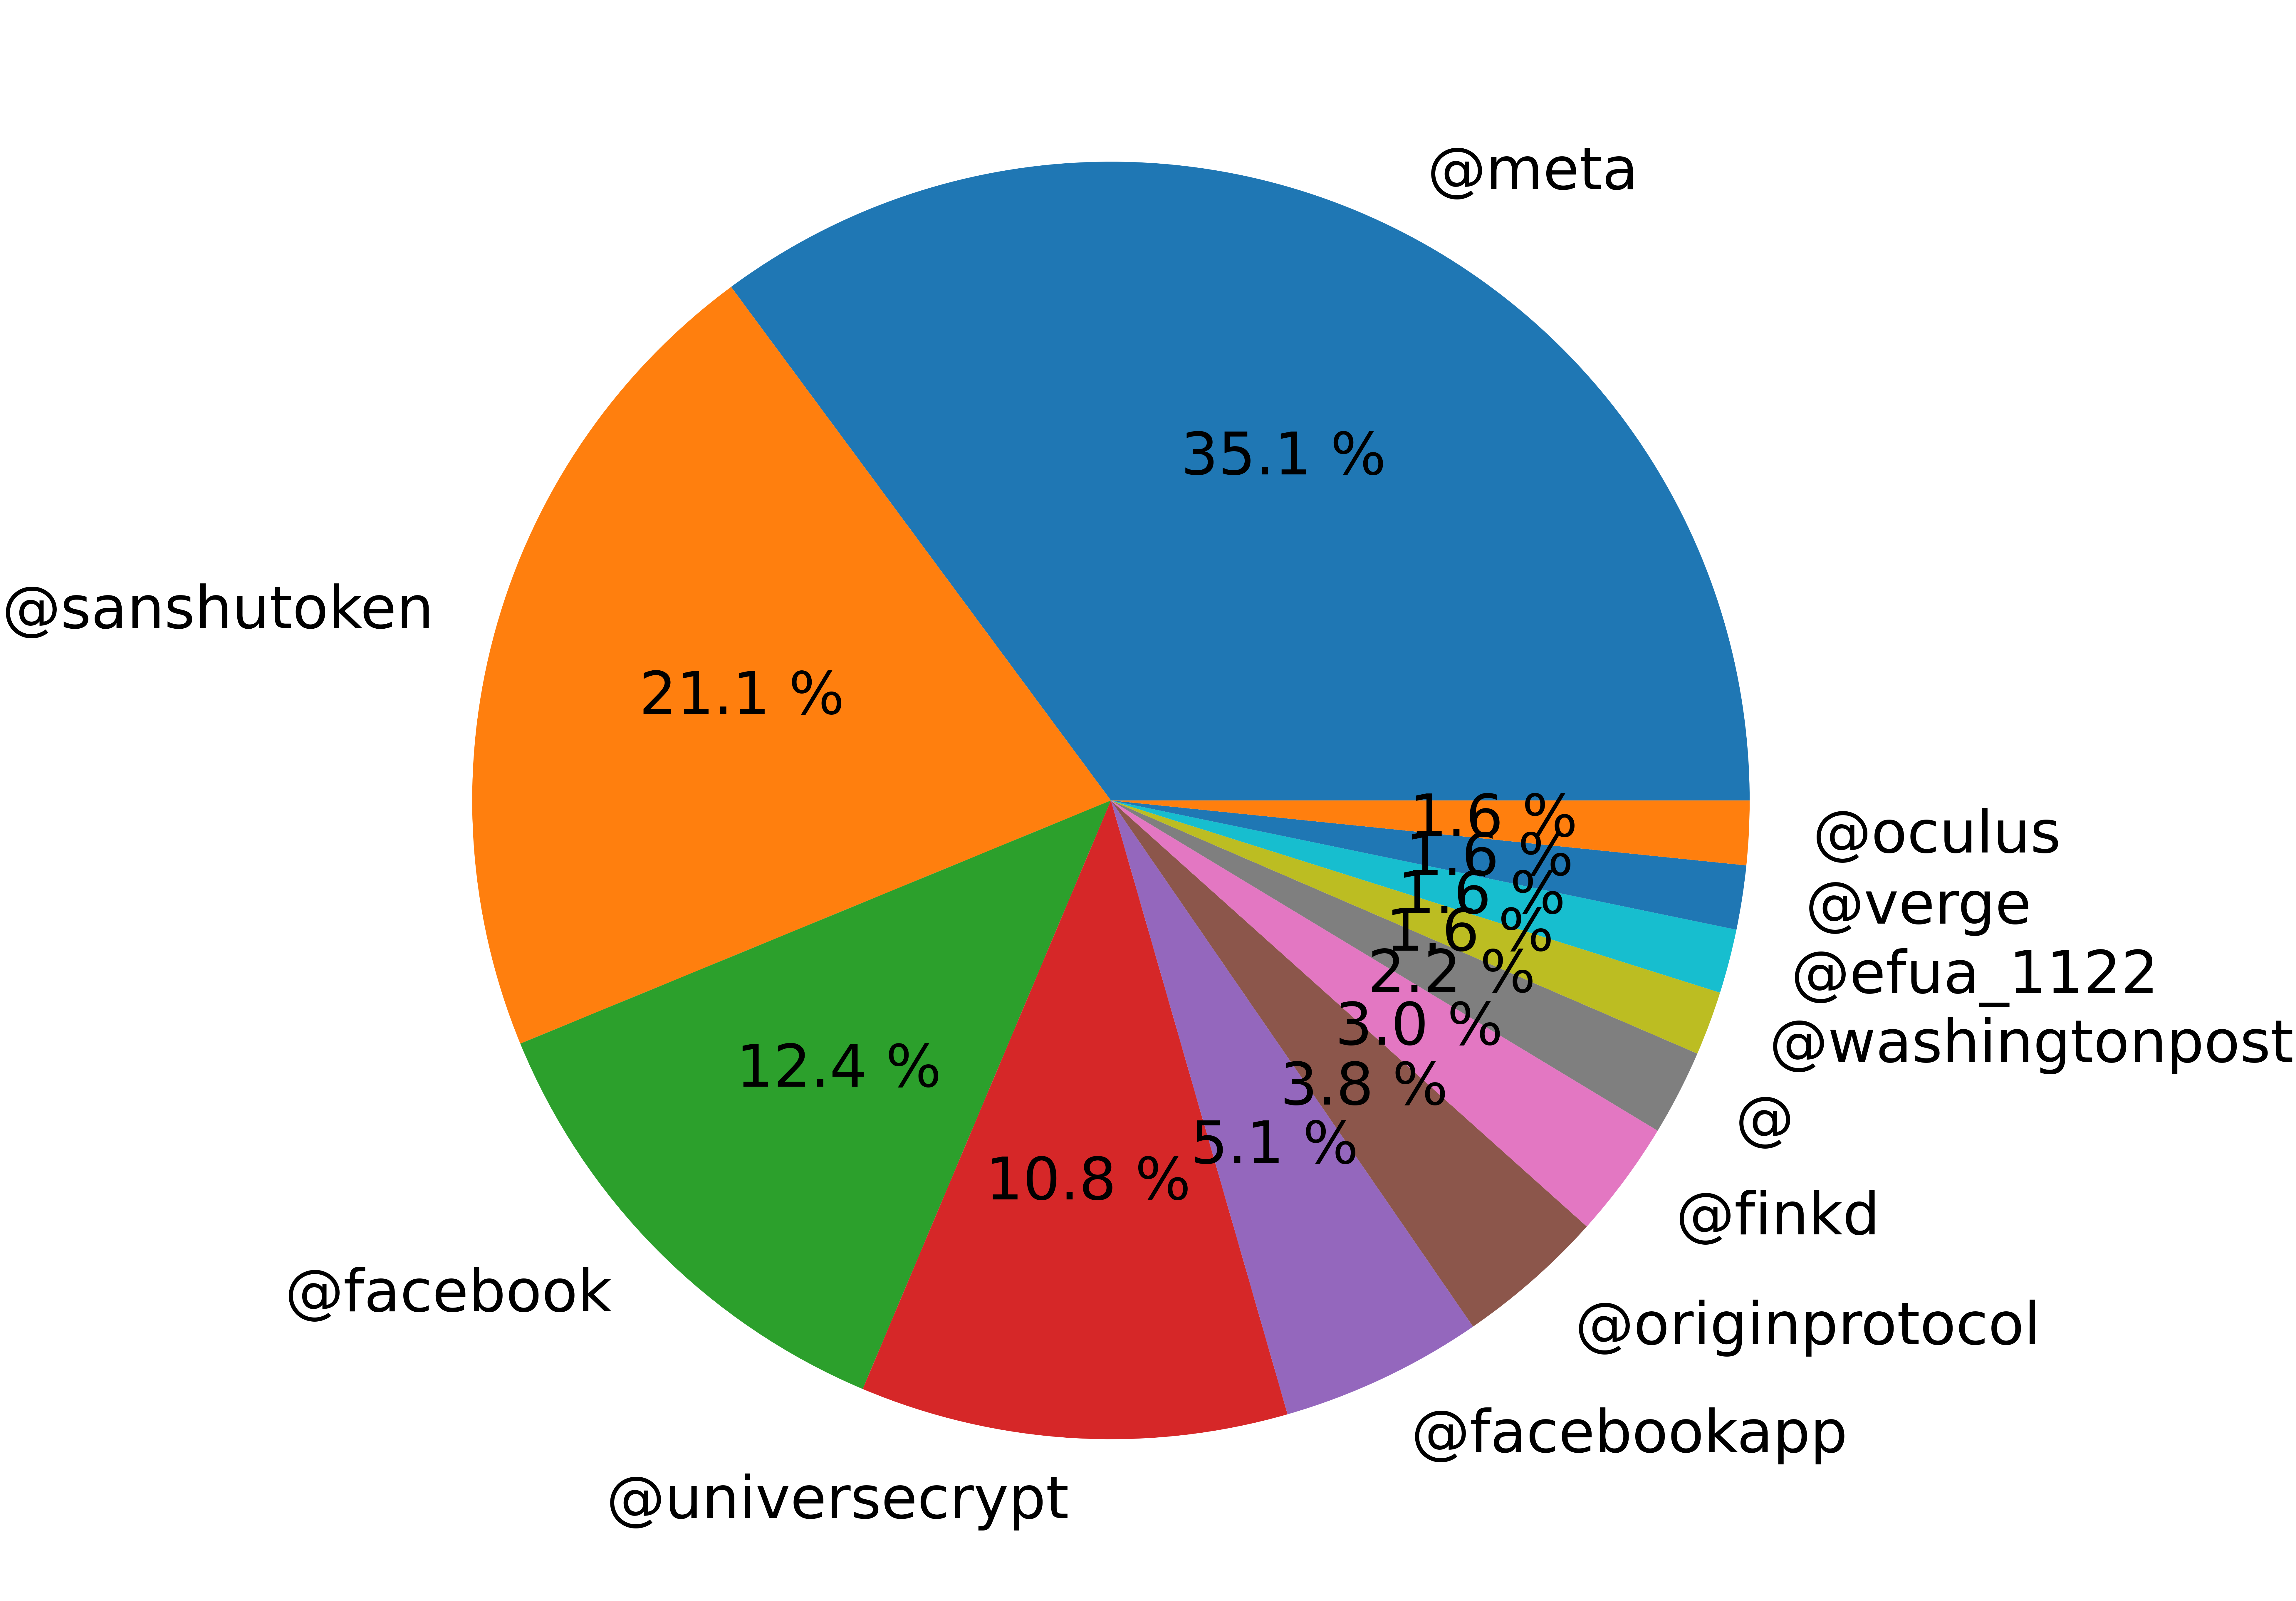

In [317]:
# EL primer analicis que podemos hacer es analizar la frecuencia de palabras.
from nltk.probability import FreqDist 
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 200
# Obtener frecuencia de cada término
fdist = FreqDist(menciones)

usuarios = []#list(fdist.keys()) 
frecuencias = []#list(fdist.values())

for nombre in fdist:
    frecuencia = fdist[nombre]
    
    if(frecuencia>5):
        #print(frecuencia)
        usuarios.append(nombre)
        frecuencias.append(frecuencia)

plt.pie(frecuencias, labels=usuarios, autopct="%0.1f %%")

plt.show()

In [299]:
frecuencias


[7, 3, 2, 2]

In [300]:
usuarios

['@meta', '@finkd', '@elonmusk', '@facebook']